In [1]:
import os, platform, sys, h5py
import numpy as np
from matplotlib import pyplot as plt

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
else:
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    
from Common import common, kfit
from TrapAnalysis import trap_analysis
from TrapAnalysis import artificial_anneal as anneal

%matplotlib inline
%config InlineBackend.figure_format='retina'

Could not import BEM module. Please do so manually.


In [22]:
PP = anneal.PostProcess()

def load_from_file(sub_dir):
    master_dir = r"/Users/gkoolstra/Desktop/Electron optimization/Realistic potential/Variable density"
    electrons_in_trap = list()
    with h5py.File(os.path.join(os.path.join(master_dir, sub_dir), "Results.h5"), "r") as f:
        for k,step in enumerate(f.keys()):
            electrons_in_trap.append(f[step+"/electrons_in_trap"][()])

            if k == 0: 
                coefficients = f[step+"/potential_coefficients"][()]
                N_electrons = np.int(len(f[step+"/electron_initial_coordinates"])/2.)
                ns_init = PP.get_electron_density(f[step+"/electron_final_coordinates"][()])
            else:
                coefficients = np.vstack((coefficients, f[step+"/potential_coefficients"][()]))
                
    return coefficients, electrons_in_trap, N_electrons, ns_init

The electron density in the figure above is 9.336e+11 m^-2
The electron density in the figure above is 1.047e+12 m^-2
The electron density in the figure above is 1.182e+12 m^-2
The electron density in the figure above is 1.309e+12 m^-2
The electron density in the figure above is 1.431e+12 m^-2
The electron density in the figure above is 1.583e+12 m^-2
The electron density in the figure above is 1.716e-13 m^-2
The electron density in the figure above is 1.757e+12 m^-2
The electron density in the figure above is 1.749e+12 m^-2
The electron density in the figure above is 1.760e+12 m^-2
The electron density in the figure above is 1.926e+12 m^-2


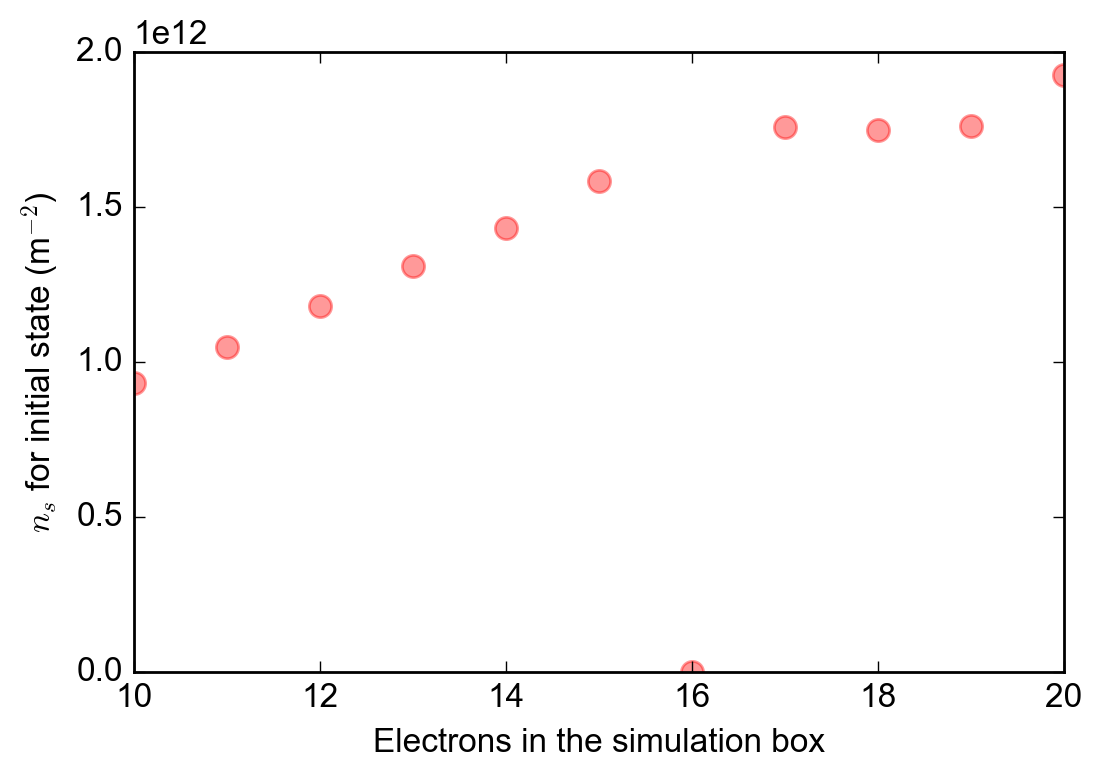

In [62]:
num_electrons = range(10, 21)
Ns = list()

for i,k in enumerate(num_electrons):
    sub_dir = r"161101_%d_electrons"%k

    coefficients, electrons_in_trap, N_electrons, ns_init = load_from_file(sub_dir)
    res, trap, resguard, centerguard, trapguard = [coefficients[:,i] for i in range(5)]
    
    if i == 0: 
        e_in_trap = electrons_in_trap
    else:
        e_in_trap = np.vstack((e_in_trap, electrons_in_trap))
    
    Ns.append(ns_init)

    if 0: 
        plt.figure(figsize=(5.,3.5))
        common.configure_axes(12)
        plt.plot(res, color="midnightblue", label="Resonator")
        plt.plot(trap, color="Red", label="Trap")
        plt.plot(resguard, color="darkviolet", label="Resonator guard")
        plt.plot(centerguard, color="lightblue", label="Center guard")
        plt.plot(trapguard, color="hotpink", label="Trap guard")
        plt.legend(loc=1, prop={"size" : 8})
        plt.xlabel("Step #")
        plt.ylabel("Electrode voltage (V)")
        plt.xlim(0, len(res))
        plt.title("%d electrons"%N_electrons)

        plt.figure(figsize=(5.,3.5))
        common.configure_axes(12)
        plt.plot(trap, electrons_in_trap, "-o", color="black")
        plt.xlabel("Trap voltage (V)")
        plt.ylabel("Number of electrons in trap")
        plt.ylim(-0.1, np.max(electrons_in_trap)+0.1)
        plt.title("%d electrons"%N_electrons)
        
plt.figure()
plt.plot(num_electrons, Ns, 'o', **common.plot_opt('r'))
plt.xlabel("Electrons in the simulation box")
plt.ylabel("$n_s$ for initial state (m$^{-2}$)")

51


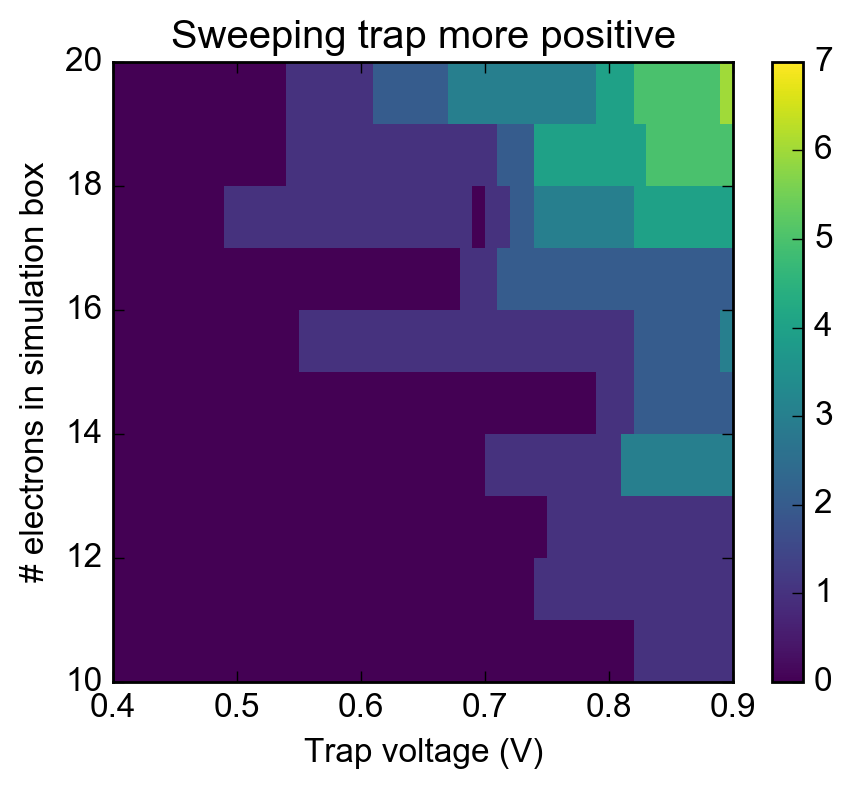

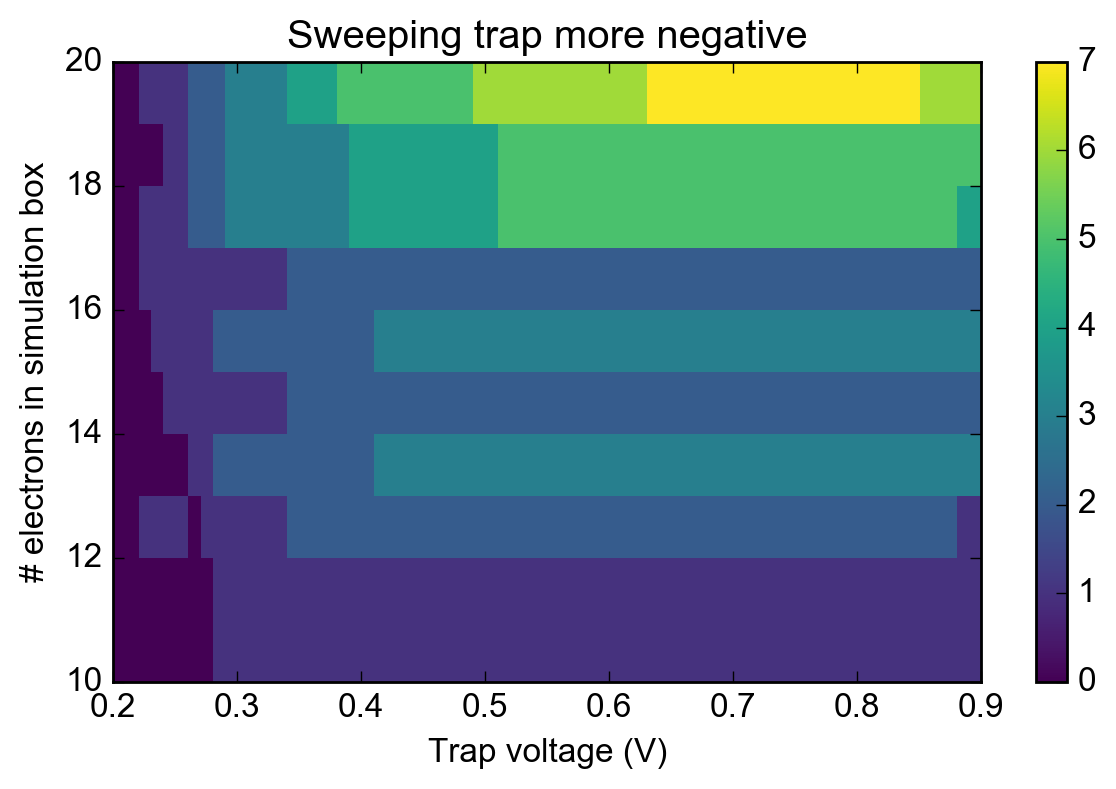

In [58]:
idx = np.where(np.diff(trap)<0)[0][0]
print(idx)

plt.figure(figsize=(5.,4.))
common.configure_axes(12)
plt.pcolormesh(trap[:idx], num_electrons, e_in_trap[:,:idx], 
               cmap=plt.cm.viridis, vmin=0, vmax=np.max(electrons_in_trap))
plt.xlabel("Trap voltage (V)")
plt.ylabel("# electrons in simulation box")
plt.title("Sweeping trap more positive")
cb = plt.colorbar()
cb.set_ticks(range(0, np.max(electrons_in_trap)+1))

plt.figure(figsize=(7.,4.))
common.configure_axes(12)
plt.pcolormesh(trap[idx:], num_electrons, e_in_trap[:,idx:], 
               cmap=plt.cm.viridis, vmin=0, vmax=np.max(electrons_in_trap))
plt.xlabel("Trap voltage (V)")
plt.ylabel("# electrons in simulation box")
plt.title("Sweeping trap more negative")
cb = plt.colorbar()
cb.set_ticks(range(0, np.max(electrons_in_trap)+1))